In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget

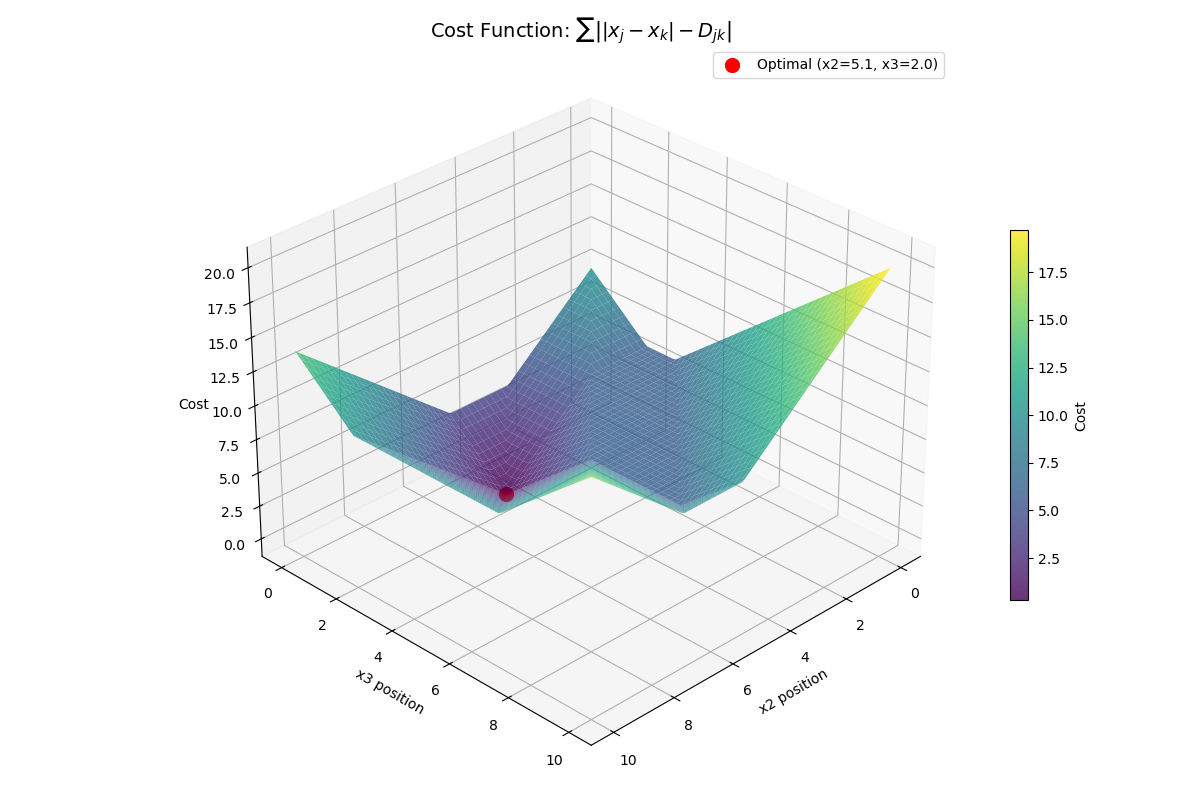

Optimal positions: x2 = 5.05, x3 = 2.02
Minimum cost: 0.10


In [10]:
# Distance matrix (D_12, D_13, D_23)
# x1 at 0, x2 at 5, x3 at 2
D = np.array([
    [0, 5, 2],  # D_11, D_12, D_13
    [5, 0, 3],  # D_21, D_22, D_23
    [2, 3, 0]   # D_31, D_32, D_33
])

# Fix x1 at 0 (reference point)
x1 = 0

# Create a grid of possible (x2, x3) positions
x_guess = np.linspace(0, 10, 100)  # x2 positions
y_guess = np.linspace(0, 10, 100)  # x3 positions
X, Y = np.meshgrid(x_guess, y_guess)

# Initialize cost matrix
cost = np.zeros_like(X)

# Compute cost for each (x2, x3) pair
for i in range(len(x_guess)):
    for j in range(len(y_guess)):
        x2 = X[i, j]  # Current x2 guess
        x3 = Y[i, j]  # Current x3 guess
        
        # Calculate absolute differences
        d12 = np.abs(x1 - x2)  # |x1 - x2|
        d13 = np.abs(x1 - x3)  # |x1 - x3|
        d23 = np.abs(x2 - x3)  # |x2 - x3|
        
        # Sum of absolute deviations from desired distances
        cost[i, j] = np.abs(d12 - D[0, 1]) + np.abs(d13 - D[0, 2]) + np.abs(d23 - D[1, 2])

# Find minimum cost
min_cost = np.min(cost)
min_idx = np.where(cost == min_cost)
optimal_x2 = X[min_idx][0]
optimal_x3 = Y[min_idx][0]

# Create 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(X, Y, cost, cmap='viridis', alpha=0.8)

# Mark optimal point
ax.scatter(optimal_x2, optimal_x3, min_cost, 
           color='red', s=100, label=f'Optimal (x2={optimal_x2:.1f}, x3={optimal_x3:.1f})')

# Labels and title
ax.set_xlabel('x2 position')
ax.set_ylabel('x3 position')
ax.set_zlabel('Cost')
ax.set_title(r'Cost Function: $\sum \left| |x_j - x_k| - D_{jk} \right|$', fontsize=14)
plt.colorbar(surf, ax=ax, shrink=0.5, label='Cost')
plt.legend()

# Adjust view
ax.view_init(elev=30, azim=45)

plt.tight_layout()
plt.show()

print(f"Optimal positions: x2 = {optimal_x2:.2f}, x3 = {optimal_x3:.2f}")
print(f"Minimum cost: {min_cost:.2f}")

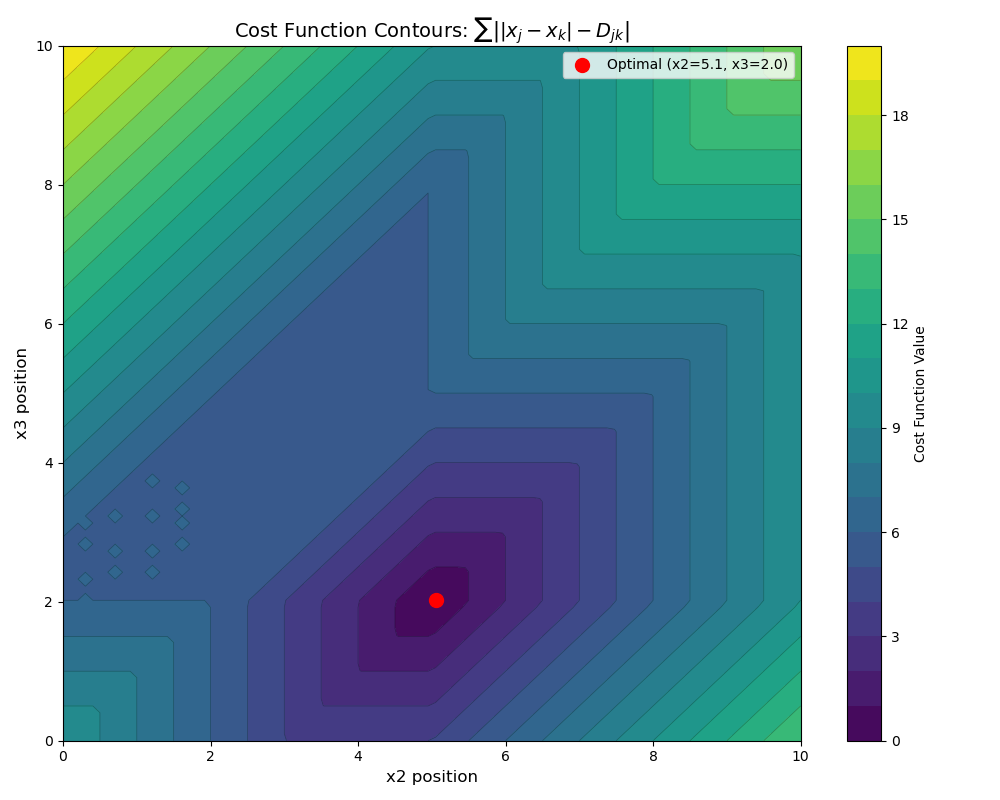

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Distance matrix
D = np.array([
    [0, 5, 2],
    [5, 0, 3],
    [2, 3, 0]
])

x1 = 0  # Reference point
x_guess = np.linspace(0, 10, 100)  # Higher resolution for smoother contours
y_guess = np.linspace(0, 10, 100)
X, Y = np.meshgrid(x_guess, y_guess)

# Vectorized cost calculation (faster)
d12 = np.abs(x1 - X)
d13 = np.abs(x1 - Y)
d23 = np.abs(X - Y)
cost = np.abs(d12 - D[0,1]) + np.abs(d13 - D[0,2]) + np.abs(d23 - D[1,2])

# Find minimum
min_idx = np.unravel_index(np.argmin(cost), cost.shape)
optimal_x2, optimal_x3 = X[min_idx], Y[min_idx]

# --- Contour Plot ---
plt.figure(figsize=(10, 8))

# Filled contours
contour = plt.contourf(X, Y, cost, levels=20, cmap='viridis')
plt.colorbar(contour, label='Cost Function Value')

# Contour lines
plt.contour(X, Y, cost, levels=20, colors='black', alpha=0.3, linewidths=0.5)

# Mark optimal point
plt.scatter(optimal_x2, optimal_x3, color='red', s=100, 
            label=f'Optimal (x2={optimal_x2:.1f}, x3={optimal_x3:.1f})')

# Labels and title
plt.xlabel('x2 position', fontsize=12)
plt.ylabel('x3 position', fontsize=12)
plt.title(r'Cost Function Contours: $\sum \left| |x_j - x_k| - D_{jk} \right|$', fontsize=14)
plt.legend()

plt.tight_layout()
plt.show()

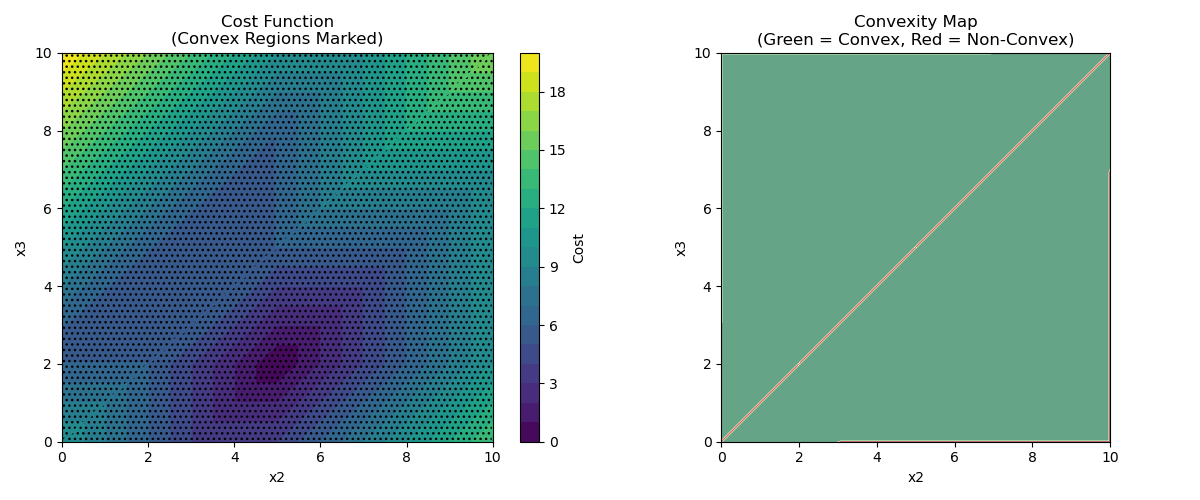

In [12]:
from scipy.ndimage import sobel, gaussian_filter

# Your original setup
D = np.array([[0, 5, 2], [5, 0, 3], [2, 3, 0]])
x1 = 0
x_guess = np.linspace(0, 10, 1000)
y_guess = np.linspace(0, 10, 1000)
X, Y = np.meshgrid(x_guess, y_guess)

# Vectorized cost calculation
d12 = np.abs(x1 - X)
d13 = np.abs(x1 - Y)
d23 = np.abs(X - Y)
cost = np.abs(d12 - D[0,1]) + np.abs(d13 - D[0,2]) + np.abs(d23 - D[1,2])

# Smooth the cost to compute cleaner derivatives
cost_smooth = gaussian_filter(cost, sigma=1)

# Compute numerical Hessian components
dx = sobel(cost_smooth, axis=0)
dy = sobel(cost_smooth, axis=1)
dxx = sobel(dx, axis=0)
dxy = sobel(dx, axis=1)
dyy = sobel(dy, axis=1)

# Eigenvalue analysis (convex if both eigenvalues ≥ 0)
eig1 = 0.5*(dxx + dyy + np.sqrt((dxx-dyy)**2 + 4*dxy**2))
eig2 = 0.5*(dxx + dyy - np.sqrt((dxx-dyy)**2 + 4*dxy**2))
convex_region = (eig1 >= -0.1) & (eig2 >= -0.1)  # Small tolerance for numerical errors

# Visualization
plt.figure(figsize=(12, 5))

# Plot 1: Cost function with convex regions overlaid
plt.subplot(121)
plt.contourf(X, Y, cost_smooth, levels=20, cmap='viridis')
plt.colorbar(label='Cost')
plt.contourf(X, Y, convex_region, levels=[0.5, 1.5], colors='none', 
              hatches=['...'], alpha=0)  # Convex region indicator
plt.title("Cost Function\n(Convex Regions Marked)")
plt.xlabel("x2")
plt.ylabel("x3")

# Plot 2: Pure convexity map
plt.subplot(122)
plt.imshow(convex_region.T, extent=[0,10,0,10], origin='lower', 
           cmap='RdYlGn', alpha=0.6)
plt.title("Convexity Map\n(Green = Convex, Red = Non-Convex)")
plt.xlabel("x2")
plt.ylabel("x3")

plt.tight_layout()
plt.show()

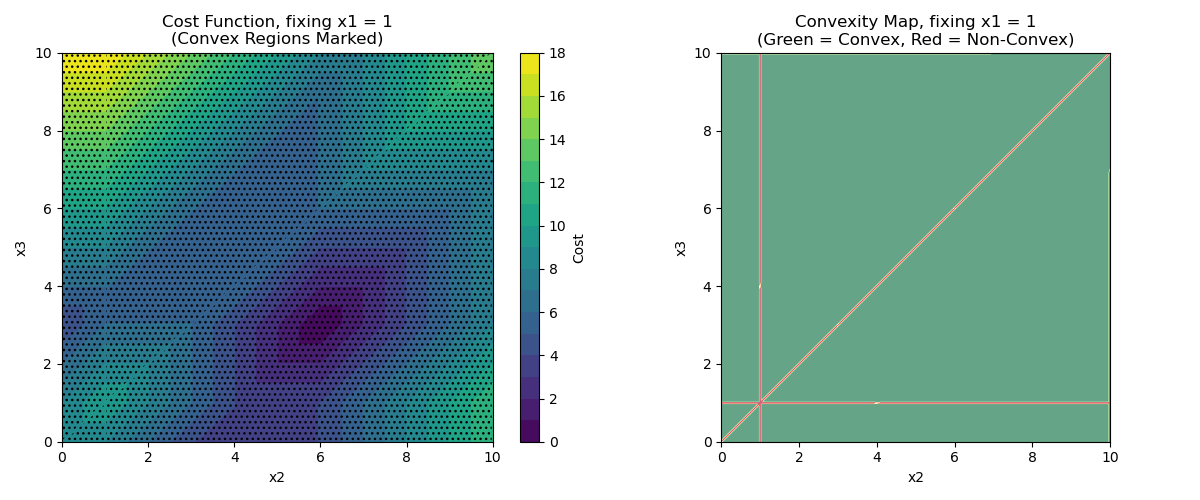

In [21]:
D = np.array([
    [0, 5, 2, 9, 4, 1, 7, 11, 15, 3],
    [5, 0, 3, 4, 1, 4, 2, 6, 10, 2],
    [2, 3, 0, 7, 2, 1, 5, 9, 13, 1],
    [9, 4, 7, 0, 5, 8, 2, 2, 6, 6],
    [4, 1, 2, 5, 0, 3, 3, 7, 11, 1],
    [1, 4, 1, 8, 3, 0, 6, 10, 14, 2],
    [7, 2, 5, 2, 3, 6, 0, 4, 8, 4],
    [11, 6, 9, 2, 7, 10, 4, 0, 4, 8],
    [15, 10, 13, 6, 11, 14, 8, 4, 0, 12],
    [3, 2, 1, 6, 1, 2, 4, 8, 12, 0]
])

x1 = 1
x_guess = np.linspace(0, 10, 1000)
y_guess = np.linspace(0, 10, 1000)
X, Y = np.meshgrid(x_guess, y_guess)

# Vectorized cost calculation
d12 = np.abs(x1 - X)
d13 = np.abs(x1 - Y)
d23 = np.abs(X - Y)
cost = np.abs(d12 - D[0,1]) + np.abs(d13 - D[0,2]) + np.abs(d23 - D[1,2])

# Smooth the cost to compute cleaner derivatives
cost_smooth = gaussian_filter(cost, sigma=1)

# Compute numerical Hessian components
dx = sobel(cost_smooth, axis=0)
dy = sobel(cost_smooth, axis=1)
dxx = sobel(dx, axis=0)
dxy = sobel(dx, axis=1)
dyy = sobel(dy, axis=1)

# Eigenvalue analysis (convex if both eigenvalues ≥ 0)
eig1 = 0.5*(dxx + dyy + np.sqrt((dxx-dyy)**2 + 4*dxy**2))
eig2 = 0.5*(dxx + dyy - np.sqrt((dxx-dyy)**2 + 4*dxy**2))
convex_region = (eig1 >= -0.1) & (eig2 >= -0.1)  # Small tolerance for numerical errors

# Visualization
plt.figure(figsize=(12, 5))

# Plot 1: Cost function with convex regions overlaid
plt.subplot(121)
plt.contourf(X, Y, cost_smooth, levels=20, cmap='viridis')
plt.colorbar(label='Cost')
plt.contourf(X, Y, convex_region, levels=[0.5, 1.5], colors='none', 
              hatches=['...'], alpha=0)  # Convex region indicator
plt.title("Cost Function, fixing x1 = 1\n(Convex Regions Marked)")
plt.xlabel("x2")
plt.ylabel("x3")

# Plot 2: Pure convexity map
plt.subplot(122)
plt.imshow(convex_region.T, extent=[0,10,0,10], origin='lower', 
           cmap='RdYlGn', alpha=0.6)
plt.title("Convexity Map, fixing x1 = 1\n(Green = Convex, Red = Non-Convex)")
plt.xlabel("x2")
plt.ylabel("x3")

plt.tight_layout()
plt.show()

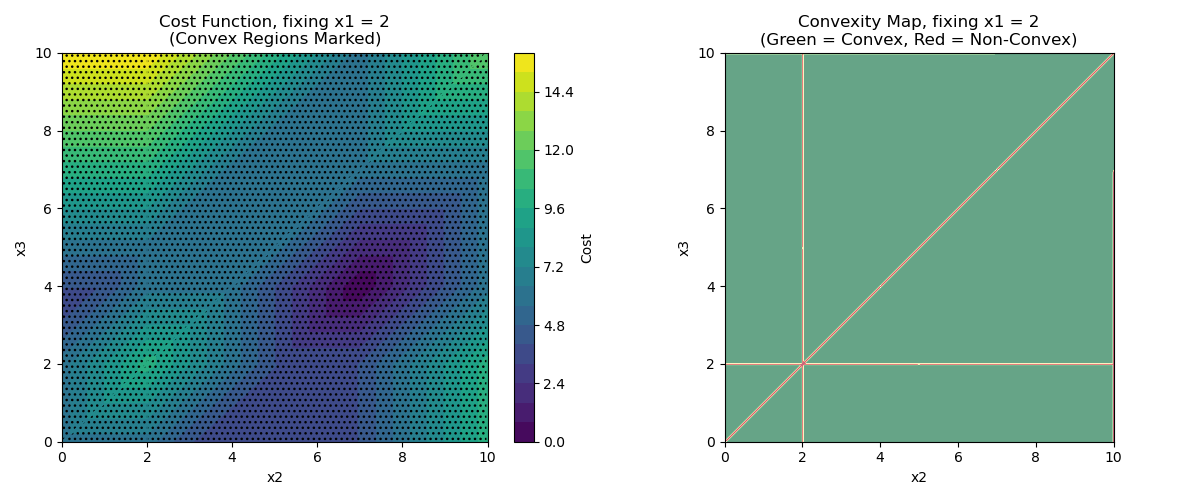

In [19]:
D = np.array([
    [0, 5, 2, 9, 4, 1, 7, 11, 15, 3],
    [5, 0, 3, 4, 1, 4, 2, 6, 10, 2],
    [2, 3, 0, 7, 2, 1, 5, 9, 13, 1],
    [9, 4, 7, 0, 5, 8, 2, 2, 6, 6],
    [4, 1, 2, 5, 0, 3, 3, 7, 11, 1],
    [1, 4, 1, 8, 3, 0, 6, 10, 14, 2],
    [7, 2, 5, 2, 3, 6, 0, 4, 8, 4],
    [11, 6, 9, 2, 7, 10, 4, 0, 4, 8],
    [15, 10, 13, 6, 11, 14, 8, 4, 0, 12],
    [3, 2, 1, 6, 1, 2, 4, 8, 12, 0]
])

x1 = 2
x_guess = np.linspace(0, 10, 1000)
y_guess = np.linspace(0, 10, 1000)
X, Y = np.meshgrid(x_guess, y_guess)

# Vectorized cost calculation
d12 = np.abs(x1 - X)
d13 = np.abs(x1 - Y)
d23 = np.abs(X - Y)
cost = np.abs(d12 - D[0,1]) + np.abs(d13 - D[0,2]) + np.abs(d23 - D[1,2])

# Smooth the cost to compute cleaner derivatives
cost_smooth = gaussian_filter(cost, sigma=1)

# Compute numerical Hessian components
dx = sobel(cost_smooth, axis=0)
dy = sobel(cost_smooth, axis=1)
dxx = sobel(dx, axis=0)
dxy = sobel(dx, axis=1)
dyy = sobel(dy, axis=1)

# Eigenvalue analysis (convex if both eigenvalues ≥ 0)
eig1 = 0.5*(dxx + dyy + np.sqrt((dxx-dyy)**2 + 4*dxy**2))
eig2 = 0.5*(dxx + dyy - np.sqrt((dxx-dyy)**2 + 4*dxy**2))
convex_region = (eig1 >= -0.1) & (eig2 >= -0.1)  # Small tolerance for numerical errors

# Visualization
plt.figure(figsize=(12, 5))

# Plot 1: Cost function with convex regions overlaid
plt.subplot(121)
plt.contourf(X, Y, cost_smooth, levels=20, cmap='viridis')
plt.colorbar(label='Cost')
plt.contourf(X, Y, convex_region, levels=[0.5, 1.5], colors='none', 
              hatches=['...'], alpha=0)  # Convex region indicator
plt.title("Cost Function, fixing x1 = 2\n(Convex Regions Marked)")
plt.xlabel("x2")
plt.ylabel("x3")

# Plot 2: Pure convexity map
plt.subplot(122)
plt.imshow(convex_region.T, extent=[0,10,0,10], origin='lower', 
           cmap='RdYlGn', alpha=0.6)
plt.title("Convexity Map, fixing x1 = 2\n(Green = Convex, Red = Non-Convex)")
plt.xlabel("x2")
plt.ylabel("x3")

plt.tight_layout()
plt.show()

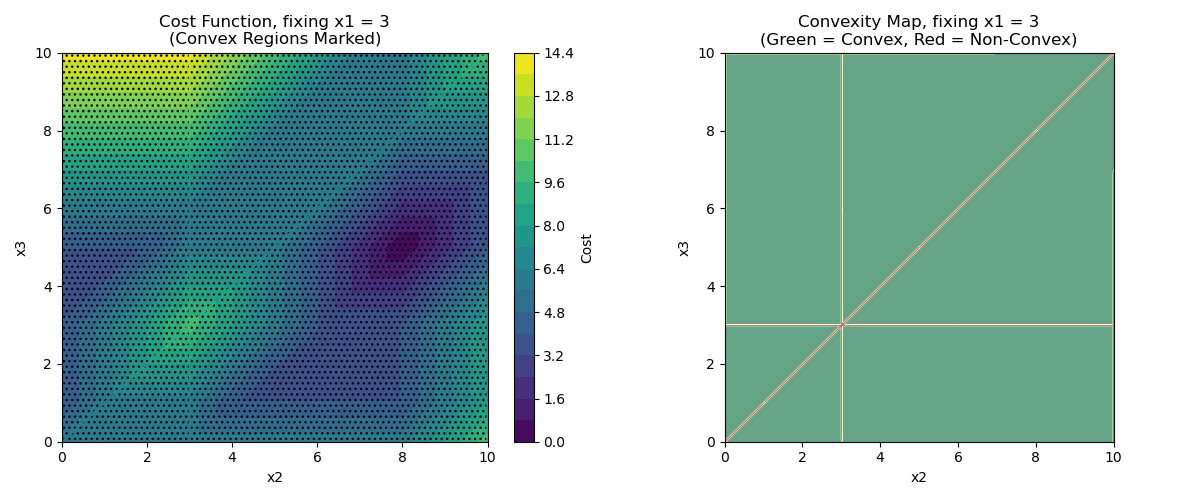

In [20]:
D = np.array([
    [0, 5, 2, 9, 4, 1, 7, 11, 15, 3],
    [5, 0, 3, 4, 1, 4, 2, 6, 10, 2],
    [2, 3, 0, 7, 2, 1, 5, 9, 13, 1],
    [9, 4, 7, 0, 5, 8, 2, 2, 6, 6],
    [4, 1, 2, 5, 0, 3, 3, 7, 11, 1],
    [1, 4, 1, 8, 3, 0, 6, 10, 14, 2],
    [7, 2, 5, 2, 3, 6, 0, 4, 8, 4],
    [11, 6, 9, 2, 7, 10, 4, 0, 4, 8],
    [15, 10, 13, 6, 11, 14, 8, 4, 0, 12],
    [3, 2, 1, 6, 1, 2, 4, 8, 12, 0]
])

x1 = 3
x_guess = np.linspace(0, 10, 1000)
y_guess = np.linspace(0, 10, 1000)
X, Y = np.meshgrid(x_guess, y_guess)

# Vectorized cost calculation
d12 = np.abs(x1 - X)
d13 = np.abs(x1 - Y)
d23 = np.abs(X - Y)
cost = np.abs(d12 - D[0,1]) + np.abs(d13 - D[0,2]) + np.abs(d23 - D[1,2])

# Smooth the cost to compute cleaner derivatives
cost_smooth = gaussian_filter(cost, sigma=1)

# Compute numerical Hessian components
dx = sobel(cost_smooth, axis=0)
dy = sobel(cost_smooth, axis=1)
dxx = sobel(dx, axis=0)
dxy = sobel(dx, axis=1)
dyy = sobel(dy, axis=1)

# Eigenvalue analysis (convex if both eigenvalues ≥ 0)
eig1 = 0.5*(dxx + dyy + np.sqrt((dxx-dyy)**2 + 4*dxy**2))
eig2 = 0.5*(dxx + dyy - np.sqrt((dxx-dyy)**2 + 4*dxy**2))
convex_region = (eig1 >= -0.1) & (eig2 >= -0.1)  # Small tolerance for numerical errors

# Visualization
plt.figure(figsize=(12, 5))

# Plot 1: Cost function with convex regions overlaid
plt.subplot(121)
plt.contourf(X, Y, cost_smooth, levels=20, cmap='viridis')
plt.colorbar(label='Cost')
plt.contourf(X, Y, convex_region, levels=[0.5, 1.5], colors='none', 
              hatches=['...'], alpha=0)  # Convex region indicator
plt.title("Cost Function, fixing x1 = 3\n(Convex Regions Marked)")
plt.xlabel("x2")
plt.ylabel("x3")

# Plot 2: Pure convexity map
plt.subplot(122)
plt.imshow(convex_region.T, extent=[0,10,0,10], origin='lower', 
           cmap='RdYlGn', alpha=0.6)
plt.title("Convexity Map, fixing x1 = 3\n(Green = Convex, Red = Non-Convex)")
plt.xlabel("x2")
plt.ylabel("x3")

plt.tight_layout()
plt.show()